## 1. TF-IDF : 형태소나누기

In [1]:
sample_text = ["데이터 과학은 과학적인 방법, 과정, 알고리즘, 시스템을 사용하여 구조화된 데이터와 비구조화된 데이터에서 지식과 통찰을 추출하는 학문 분야입니다.",
               "머신 러닝은 인공지능의 한 분야로, 알고리즘과 통계적 모델을 사용하여 컴퓨터가 경험을 통해 작업 성능을 개선하도록 하는 기술입니다.",
               "인공지능은 인간의 지능을 기계에서 시뮬레이션하는 것으로, 인간처럼 생각하고 행동하도록 프로그램된 시스템을 말합니다."]

In [3]:
sample_text

['데이터 과학은 과학적인 방법, 과정, 알고리즘, 시스템을 사용하여 구조화된 데이터와 비구조화된 데이터에서 지식과 통찰을 추출하는 학문 분야입니다.',
 '머신 러닝은 인공지능의 한 분야로, 알고리즘과 통계적 모델을 사용하여 컴퓨터가 경험을 통해 작업 성능을 개선하도록 하는 기술입니다.',
 '인공지능은 인간의 지능을 기계에서 시뮬레이션하는 것으로, 인간처럼 생각하고 행동하도록 프로그램된 시스템을 말합니다.']

In [5]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [11]:
documents = []

for doc in sample_text:
    doc_pos = [i[0] for i in kiwi.tokenize(doc)]
    documents.append(' '.join(doc_pos))

In [13]:
documents

['데이터 과학 은 과학 적 이 ᆫ 방법 , 과정 , 알고리즘 , 시스템 을 사용 하 어 구조 화 되 ᆫ 데이터 와 비 구조 화 되 ᆫ 데이터 에서 지식 과 통찰 을 추출 하 는 학문 분야 이 ᆸ니다 .',
 '머신 러닝 은 인공 지능 의 한 분야 로 , 알고리즘 과 통계 적 모델 을 사용 하 어 컴퓨터 가 경험 을 통하 어 작업 성능 을 개선 하 도록 하 는 기술 이 ᆸ니다 .',
 '인공 지능 은 인간 의 지능 을 기계 에서 시뮬레이션 하 는 것 으로 , 인간 처럼 생각 하 고 행동 하 도록 프로그램 되 ᆫ 시스템 을 말 하 ᆸ니다 .']

## 2. TF-IDF : TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
#벡터라이즈 생성
vectorizer = TfidfVectorizer()

In [19]:
#tf-idf 계산
tfidf_matrix = vectorizer.fit_transform(documents)

In [23]:
words = vectorizer.get_feature_names_out()
words

array(['ᆸ니다', '개선', '경험', '과정', '과학', '구조', '기계', '기술', '데이터', '도록', '러닝',
       '머신', '모델', '방법', '분야', '사용', '생각', '성능', '시뮬레이션', '시스템', '알고리즘',
       '에서', '으로', '인간', '인공', '작업', '지능', '지식', '처럼', '추출', '컴퓨터', '통계',
       '통찰', '통하', '프로그램', '학문', '행동'], dtype=object)

In [27]:
#데이터프레임으로 결과값 보기
import pandas as pd
df = pd.DataFrame(tfidf_matrix.toarray(), columns = words)
df

,ᆸ니다,개선,경험,과정,과학,구조,기계,기술,데이터,도록,...,지식,처럼,추출,컴퓨터,통계,통찰,통하,프로그램,학문,행동
0,0.115297,0.000000,0.000000,0.195214,0.390428,0.390428,0.000000,0.000000,0.585642,0.000000,...,0.195214,0.000000,0.195214,0.000000,0.000000,0.195214,0.000000,0.000000,0.195214,0.000000
1,0.153424,0.259769,0.259769,0.000000,0.000000,0.000000,0.000000,0.259769,0.000000,0.197561,...,0.000000,0.000000,0.000000,0.259769,0.259769,0.000000,0.259769,0.000000,0.000000,0.000000
2,0.147765,0.000000,0.000000,0.000000,0.000000,0.000000,0.250188,0.000000,0.000000,0.190274,...,0.000000,0.250188,0.000000,0.000000,0.000000,0.000000,0.000000,0.250188,0.000000,0.250188


In [29]:
#행과 열을 변환
tfidf_df = df.T
tfidf_df

,0,1,2
ᆸ니다,0.115297,0.153424,0.147765
개선,0.000000,0.259769,0.000000
경험,0.000000,0.259769,0.000000
과정,0.195214,0.000000,0.000000
과학,0.390428,0.000000,0.000000
구조,0.390428,0.000000,0.000000
기계,0.000000,0.000000,0.250188
기술,0.000000,0.259769,0.000000
데이터,0.585642,0.000000,0.000000
도록,0.000000,0.197561,0.190274


In [33]:
#0번 문서에 대한 tfidf 값 정렬
tfidf_df[0].sort_values(ascending = False)

데이터      0.585642
과학       0.390428
구조       0.390428
지식       0.195214
학문       0.195214
과정       0.195214
통찰       0.195214
추출       0.195214
방법       0.195214
에서       0.148465
알고리즘     0.148465
시스템      0.148465
분야       0.148465
사용       0.148465
ᆸ니다      0.115297
지능       0.000000
컴퓨터      0.000000
처럼       0.000000
인공       0.000000
통계       0.000000
통하       0.000000
프로그램     0.000000
작업       0.000000
시뮬레이션    0.000000
인간       0.000000
으로       0.000000
개선       0.000000
성능       0.000000
생각       0.000000
모델       0.000000
머신       0.000000
러닝       0.000000
도록       0.000000
기술       0.000000
기계       0.000000
경험       0.000000
행동       0.000000
Name: 0, dtype: float64

## 3-1. 트리맵 시각화

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import squarify 
import matplotlib.font_manager as fm

In [43]:
data = tfidf_df[0].sort_values(ascending = False)[:15]
data

데이터     0.585642
과학      0.390428
구조      0.390428
지식      0.195214
학문      0.195214
과정      0.195214
통찰      0.195214
추출      0.195214
방법      0.195214
에서      0.148465
알고리즘    0.148465
시스템     0.148465
분야      0.148465
사용      0.148465
ᆸ니다     0.115297
Name: 0, dtype: float64

In [45]:
label = data.index
sizes = data.values
print(label)
print(sizes)

Index(['데이터', '과학', '구조', '지식', '학문', '과정', '통찰', '추출', '방법', '에서', '알고리즘',
       '시스템', '분야', '사용', 'ᆸ니다'],
      dtype='object')
[0.5856424  0.39042827 0.39042827 0.19521413 0.19521413 0.19521413
 0.19521413 0.19521413 0.19521413 0.14846538 0.14846538 0.14846538
 0.14846538 0.14846538 0.11529661]


In [62]:
#컬러 설정하기
norm = matplotlib.colors.Normalize(vmin = min(sizes), vmax = max(sizes))
colors = [matplotlib.cm.spring(norm(s)) for s in sizes]

In [68]:
#폰트 설정하기
#경로
font_path = r'C:\Windows\Fonts\HMKMRHD.TTF'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font_name)
plt.rcParams['font.size'] = 10

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4536 (\N{HANGUL JONGSEONG PIEUP}) missing from font(s) Headline R.
  fig.canvas.print_figure(bytes_io, **kw)


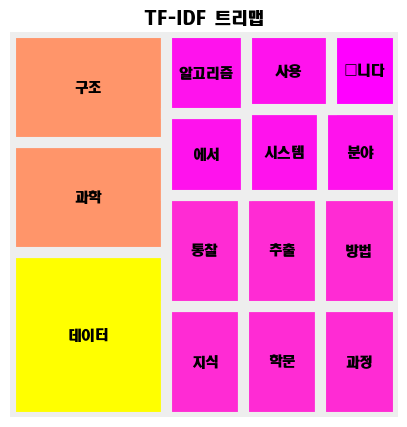

In [70]:
#그림그리기
plt.figure(figsize=(5,5))

squarify.plot(sizes = sizes,
             label = label,
             color = colors,
             bar_kwargs= dict(linewidth = 8, edgecolor = "#eee")
             )

plt.title("TF-IDF 트리맵")
plt.axis("off")
plt.show()

### 3-2 워드클라우드

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [76]:
from PIL import Image #파이썬에서 이미지를 불러올수 있게해주는 라이브러리
import numpy as np

In [80]:
image_path = r"C:\Users\user\Desktop\죠르디.jpg"
mask_image = np.array(Image.open(image_path))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [  0,   0,   0]],

       ...,

       [[181, 181, 181],
        [181, 181, 181],
        [181, 181, 181],
        ...,
        [182, 182, 182],
        [210, 210, 210],
        [  0,   0,   0]],

       [[181, 181, 181],
        [181, 181, 181],
        [181, 181, 181],
        ...,
        [182, 182, 182],
        [210, 210, 210],
        [  0,   0,   0]],

       [[181, 181, 181],
        [181, 181, 181],
        [181, 181, 181],
        ...,
        [182, 182, 182],
        [210, 210, 210],
        [  0,   0,   0]]

In [82]:
#워드클라우드 선언
wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\HMKMRHD.TTF',
                     width = 700,
                     height = 700,
                     background_color='white',
                      colormap= 'spring',
                      mask = mask_image
                      ).generate_from_frequencies(tfidf_df[0])

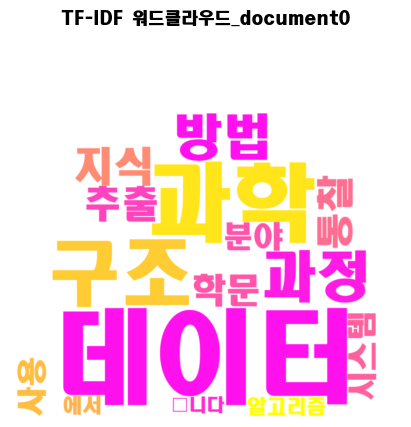

In [84]:
#워드클라우드 출력
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF 워드클라우드_document0')
plt.show()